In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Part 1: PCA (25 pts)

In this part, we will use PCA on some real dataset. 

Reuqirements:
1. You should write your own code. You are not allowed to use `sklear.decomposition.PCA` command. (5 pts)

2. Your solution should contain two functions. Function 1 takes data matrix X and integer k as inputs, and returns first k principal components. Function 2 takes data matrix X as input and a threshold $0\leq\eta\leq1$ as inputs, and returns an integer k such that the first $k$ principal components (smallest) has explained variance ratio more than $\eta$. **Your function should work for any data matrix X. In other words, you cannot use any global variable in your function.** (10 pts)

3. Visualize your new datasets in 2D and state your observations. (3 pts)

4. Report the smallest number of principal components reuired to explain 80% variance ratio for both datasets. (2 pts)

5. Function docstrings are required. You should also use inline comments and markdown to explain your code and make conclusions. (5 pts)

Hints:
1. You can assume that each row in $X$ represents a data.
2. Sample codes in lecture notes are helpful.

Datasets:
1. diabetes dataset: url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/diabetes.csv"
2. swiss roll dataset: url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/swiss.csv"

In [2]:
# your solution here
#reading data sets and convert to np array format
data_diabetes = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/diabetes.csv")
diabetes_data = np.asarray(data_diabetes)

data_swiss = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/swiss.csv")
swiss_roll_data = np.asarray(data_swiss)

In [3]:
def first_components(X, k):
    """
    Compute first k principal components

    Args:
    - X (np array): data matrix
    - k (int): principal components to return

    Returns:
    - np array: array of first k principal components
    """
    #Standardization of data set
    X_standard = (X - np.mean(X, axis=0)) / np.std(X, axis=0, ddof=1)
    
    #Compute SVD
    U, sigma, V = np.linalg.svd(X_standard, full_matrices=False)
    
    #select first k components for output
    V_k = V[:k, :]

    return V_k


In [4]:

def components_var(X, eta):
    """
    calculate number of principal components 
    needed to explain at least eta% of variance using SVD

    Args:
    - X (np array): data matrix
    - eta (float): 0 <= eta <= 1

    Returns:
    - int: The number of principal components required
    """
    #Standardization of data set
    X_standard = (X - np.mean(X, axis=0)) / np.std(X, axis=0, ddof=1)
    
    #Compute SVD
    U, sigma, V = np.linalg.svd(X_standard, full_matrices=False)
    
    #Compute explained variance
    X_pca = X_standard @ V.T
    var_explained = np.var(X_pca, axis = 0)
    total_var = sum(var_explained)
    cumulative_variance_ratio = np.cumsum(var_explained) / total_var
    
    # Find the number of components needed to exceed the threshold eta
    k = np.argmax(cumulative_variance_ratio >= eta) + 1
    
    return k


In [5]:
def plot_pca(X):
    """
    Plots data in 2 principal components

    Parameters:
    - X (numpy.ndarray): The data matrix.
    """
    #Standardization of data set
    X_standard = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    #reduce to two principal components
    pcs = first_components(X, 2)
    
    #Project data to the principal component
    X_project = X_standard @ pcs.T
    
    #configue plot and add label
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_project[:, 0], 
                          X_project[:, 1], 
                          c=labels, alpha=0.5, cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Projection (2D)')
    plt.grid(True)
    plt.show()


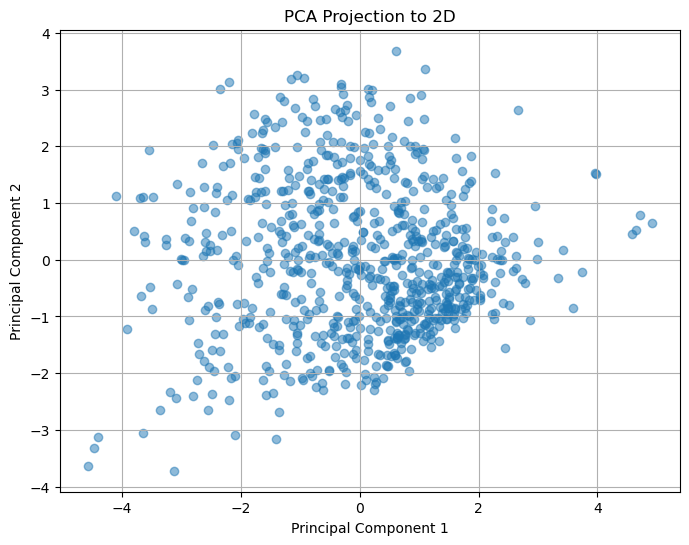

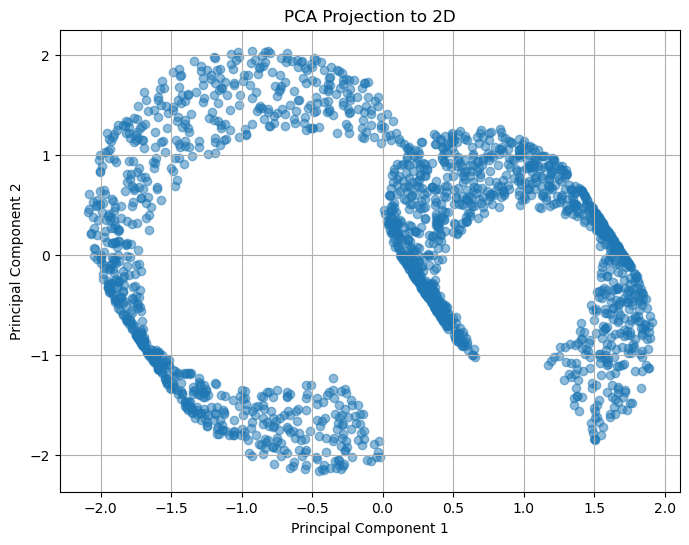

Diabetes dataset: 6 components required to explain 80% variance.
Swiss Roll dataset: 3 components required to explain 80% variance.


In [6]:
# Plot the results in 2D for both datasets


#calculate number of components required for 80% variance
k_diabetes = components_var(diabetes_data, 0.8)
k_swiss_roll = components_var(swiss_roll_data, 0.8)

#plot data sets
plot_pca(diabetes_data)
plot_pca(swiss_roll_data)

print(f"Diabetes: {k_diabetes} components to explain 80% variance.")
print(f"Swiss Roll: {k_swiss_roll} components to explain 80% variance.")


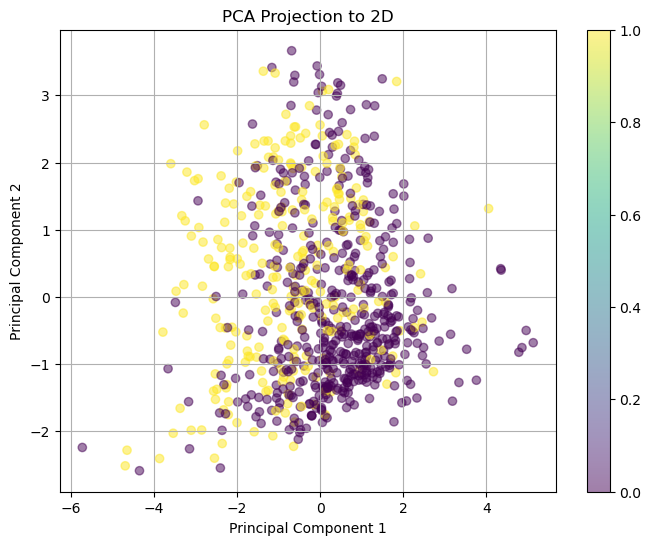

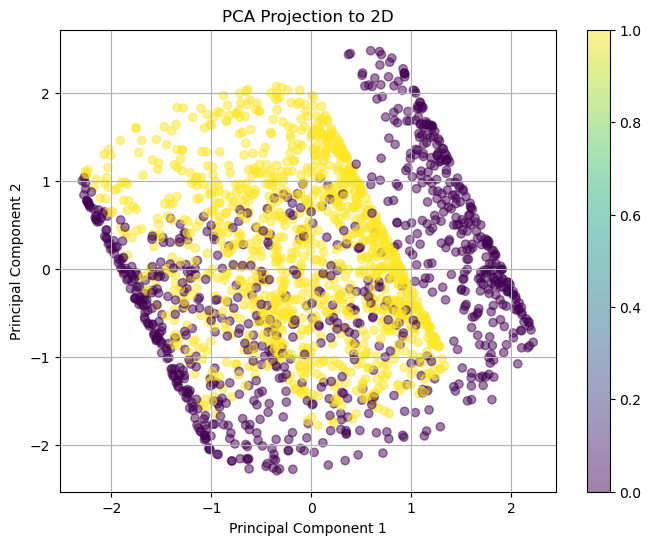

Diabetes dataset: 5 components required to explain 80% variance.
Swiss Roll dataset: 3 components required to explain 80% variance.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def principal_components(X, k):
    """
    Compute first k principal components using Singular Value Decomposition (SVD).

    Args:
    - X (np array): Data matrix.
    - k (int): Number of principal components to return.

    Returns:
    - np array: Matrix of first k principal components.
    """
    # Standardize the dataset
    X_standard = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # Compute SVD
    U, sigma, Vt = np.linalg.svd(X_standard, full_matrices=False)
    
    # Select first k components
    return Vt[:k, :]

def components_for_variance(X, eta):
    """
    Calculate the number of principal components needed to explain at least eta fraction of the variance.

    Args:
    - X (np array): Data matrix.
    - eta (float): Fraction of variance that needs to be explained, 0 <= eta <= 1.

    Returns:
    - int: Number of principal components required.
    """
    # Standardize the dataset
    X_standard = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # Compute SVD
    U, sigma, Vt = np.linalg.svd(X_standard, full_matrices=False)
    
    # Compute explained variance from singular values
    var_explained = sigma**2 / (len(X) - 1)
    cumulative_variance_ratio = np.cumsum(var_explained) / sum(var_explained)
    
    # Find the number of components needed to exceed the threshold eta
    return np.argmax(cumulative_variance_ratio >= eta) + 1

def plot_pca_2D(X, labels):
    """
    Plots the first two principal components of the dataset X and color codes points using labels.

    Parameters:
    - X (numpy.ndarray): The data matrix (excluding labels).
    - labels (numpy.ndarray): Labels for the data to color code in the plot.
    """
    # Standardize X
    X_standard = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # Get the first two principal components
    pcs = principal_components(X_standard, 2)
    
    # Project the standardized data onto the principal components
    X_projected = X_standard @ pcs.T
    
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_projected[:, 0], X_projected[:, 1], c=labels, alpha=0.5, cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Projection to 2D')
    plt.colorbar(scatter)
    plt.grid(True)
    plt.show()

# Load datasets and exclude last column (labels)
data_diabetes = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/diabetes.csv")
diabetes_X = data_diabetes.iloc[:, :-1].values
diabetes_labels = data_diabetes.iloc[:, -1].values

data_swiss = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/swiss.csv")
swiss_X = data_swiss.iloc[:, :-1].values
swiss_labels = data_swiss.iloc[:, -1].values

# Compute the number of components required to explain 80% of the variance
k_diabetes = components_for_variance(diabetes_X, 0.8)
k_swiss_roll = components_for_variance(swiss_X, 0.8)

# Plot the 2D PCA projections
plot_pca_2D(diabetes_X, diabetes_labels)
plot_pca_2D(swiss_X, swiss_labels)

# Report the number of components needed
print(f"Diabetes dataset: {k_diabetes} components required to explain 80% variance.")
print(f"Swiss Roll dataset: {k_swiss_roll} components required to explain 80% variance.")


# Part 2: Least square (25 pts)

Consider the following least-square problem

$$ \mathop{ \mathrm{min} }_x \|Ax-b\|_2^2, $$

the solution can be written as a nice formula $x=(A^TA)^{-1}A^Tb$, which comes from normal equation $A^TAx = A^Tb$.


In this part, we want to compare the computational times of using matrix inverse and solve command.

Step 1: Write a function to generate matrix $A$ with m rows and N columns, and observation vector $b$ with m rows 1 column. Both matrix $A$ and vector $b$ are randomly generated by using `np.random`. The distribution of $A$ or $b$ can be either standard gaussian (`np.random.randn`) or uniform (`np.random.rand`). In other words, your function should allow four different choices, which are 1. gaussian $A$ and gaussian $b$, 2. gaussian $A$ and uniform $b$, 3. uniform $A$ and gaussian $b$, and 4. uniform $A$ and uniform $b$. (5 pts)

Step 2: Use function written in step 1 to generate $A$ and $b$ with fixed number of rows $m=10000$ and varied number of columns $N=[1000,2000,4000,8000,16000]$ (You can determine the distribution you want to use). Then, use matrix inverse and solve command to solve least square problem with $A$ and $b$. (5 pts)

Step 3: Visualization and conclusion. The first plot is computation time (y-axis) vs N (x-axis) for inverse matrix method and solve command method. The second plot is plotting log(time) (y-axis) vs log(N) (x-axis). You should add legends, titles, xlabels, ylabels and etc to make your plot clear. What is your conclusion? (10 pts, 5 pts each figure)


**Requirement:**

You should write docstring for your function and inline comments for your codes. (5 pts)

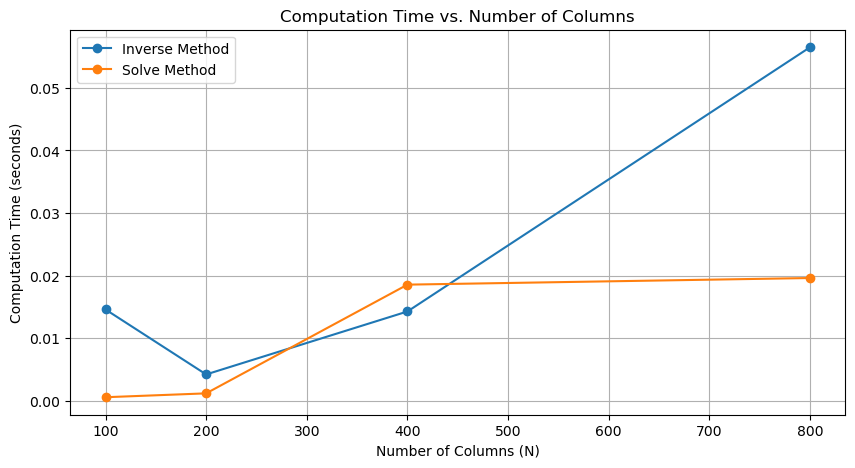

In [1]:
# Function to generate matrices and vectors
def generate_matrix_and_vector(m, N, A_dist='gaussian', b_dist='gaussian'):
    if A_dist == 'gaussian':
        A = np.random.randn(m, N)
    else:
        A = np.random.rand(m, N)

    if b_dist == 'gaussian':
        b = np.random.randn(m, 1)
    else:
        b = np.random.rand(m, 1)

    return A, b

# Set manageable matrix sizes for demonstration
m = 1000
Ns = [100, 200, 400, 800]  # Smaller Ns for feasibility
inverse_times = []
solve_times = []

for N in Ns:
    A, b = generate_matrix_and_vector(m, N)
    
    # Inverse method
    start_time = time.time()
    x_inv = np.linalg.inv(A.T @ A) @ A.T @ b
    inverse_time = time.time() - start_time
    inverse_times.append(inverse_time)
    
    # Solve method
    start_time = time.time()
    x_solve = np.linalg.solve(A.T @ A, A.T @ b)
    solve_time = time.time() - start_time
    solve_times.append(solve_time)

# Plotting computation times
plt.figure(figsize=(10, 5))
plt.plot(Ns, inverse_times, label='Inverse Method', marker='o')
plt.plot(Ns, solve_times, label='Solve Method', marker='o')
plt.xlabel('Number of Columns (N)')
plt.ylabel('Computation Time (seconds)')
plt.title('Computation Time vs. Number of Columns')
plt.legend()
plt.grid(True)
plt.show()

